## Imports

In [356]:
#imports
import math
import random
import timeit
import matplotlib.pyplot as plt 

## Helper funcs

In [357]:

def dist(p1, p2): #Distance between two points
    return (p2[1] - p1[1])**2 + (p2[0] - p1[0])**2

def orientation(p1, p2, p3): # Cross product of the vectors p1p2 and p2p3. 
    return (p3[1]-p2[1])*(p2[0]-p1[0]) - (p2[1]-p1[1])*(p3[0]-p2[0])


def findLeftmostPoint(inputSet):
   leftmostPoint = inputSet[0]  
   for i in range(len(inputSet)):
       if inputSet[i][1] < leftmostPoint[1] or (inputSet[i][1] == leftmostPoint[1] and inputSet[i][0] < leftmostPoint[0]):
          leftmostPoint = inputSet[i]
   return leftmostPoint

## Jarvis March

In [358]:
def jarvismarch(inputSet):
    left = findLeftmostPoint(inputSet)
    onHull = left
    outputSet = []
    nextPoint = None
    while nextPoint !=left:
        outputSet.append(onHull)
        nextPoint = inputSet[0] 
        for point in inputSet:
            o = orientation(onHull, nextPoint, point) 
            if nextPoint == onHull or o > 0 or (o == 0 and dist(onHull, point) > dist(onHull, nextPoint)):
                nextPoint = point
        onHull = nextPoint
    return outputSet

## Graham scan

### Optimisations to add

Order inputSet using cross products NOT trig

temporarily removed other sorting algos for clarity.

replaced "distance" func with "dist" - redundant function

In [359]:
def mergeSort(numbers):        
    if (len(numbers) > 1):
        return merge(mergeSort(numbers[:len(numbers)//2]),mergeSort(numbers[len(numbers)//2:]))
    else:
        return numbers
    
def merge(arr1, arr2):
        
    new_arr = []
    i = 0
    j = 0
    while i < len(arr1) and j < len(arr2):
        if arr1[i][1] < arr2[j][1] or (arr1[i][1] == arr2[j][1] and arr1[i][2] < arr2[j][2]):
            new_arr.append(arr1[i])
            i += 1
        else:
            new_arr.append(arr2[j])
            j += 1

    if i < len(arr1):
        new_arr.extend(arr1[i:])
    elif j < len(arr2):
        new_arr.extend(arr2[j:])
    return new_arr

def findLowestPoint(inputSet):        
    lowestPoint = inputSet[0]  
    lowestIndex = 0
    for i in range(len(inputSet)):
        # Choose lowest y, break ties by choosing lowest x
        if inputSet[i][1] < lowestPoint[1] or (inputSet[i][1] == lowestPoint[1] and inputSet[i][0] < lowestPoint[0]):
            lowestPoint = inputSet[i]
            lowestIndex = i
    
    return lowestIndex, lowestPoint

def turnMade(point1, point2, point3):   
    return (point2[0] - point1[0]) * (point3[1]-point1[1]) - (point2[1]-point1[1]) * (point3[0] - point1[0])

def polarAngle(point1, point2):
    return math.atan2((point2[1] - point1[1]), (point2[0] - point1[0]))


def grahamscan(inputSet, sortingAlgorithmToUse = "merge"):
    
    # Finds the point with the lowest y-coordinate, breaks ties by going for lowest x-coordinate 
    lowestIndex, lowestPoint = findLowestPoint(inputSet) 
    # Swaps it with the first item in the inputSet
    inputSet[0] , inputSet[lowestIndex] = inputSet[lowestIndex] , inputSet[0]

    # Sorts the remaining points based on their polar angle with the lowestPoint (inputSet[0]),
    # Breaks ties by distance from the lowest point. 
    if sortingAlgorithmToUse == "python":
        sortedPoints = sorted(inputSet[1:], key=lambda point: polarAngle(lowestPoint, point))
    else:
        sortedPointsWithAngles = [(point, polarAngle(lowestPoint, point), dist(lowestPoint, point)) for point in inputSet[1:]]
        # Merge Sort
        if sortingAlgorithmToUse == "merge":
            sortedPointsWithAngles = mergeSort(sortedPointsWithAngles)
        sortedPoints = [point for point, angle, distance in sortedPointsWithAngles]

    convexHull = []
    # LowestPoint is first in convex hull
    convexHull.append(inputSet[0])
    # First connection to lowestPoint is second in convex hull
    convexHull.append(sortedPoints[0])

    i = 2
    previousAngleWasColinear = False
    # Sorted points processed from beginning to end
    while i < len(sortedPoints):
        # Consider the next three points in the convex hull
        lastPoint = convexHull[-1]
        lastPointBefore = convexHull[-2]
        pointConsidered = sortedPoints[i]

        turnDirection = turnMade(lastPointBefore, lastPoint, pointConsidered)
        # Counter-Clockwise of the most recent three points, so add to the hull
        if (turnDirection > 0):
            convexHull.append(pointConsidered)
            previousAngleWasColinear = False
            i += 1
        # Clockwise of the most recent three points, so pop from the hull
        elif len(convexHull) > 2 and turnDirection < 0:
            convexHull.pop()
            previousAngleWasColinear = False
        elif (turnDirection == 0):
            # If we're in a sequence of colinear points, pop the previous node because we've found another colinear point
            # Or edge case: where the third point (2nd index) in sortedPoints started a colinear sequence, so the second point (1st index) should be discarded
            if previousAngleWasColinear == True or i == 2:
                convexHull.pop()
            # Append the most recent colinear point to the convexHull
            convexHull.append(pointConsidered)
            previousAngleWasColinear = True
            i += 1
        else:
            i+=1
    outputSet = convexHull
    return outputSet


## Chan

In [360]:
def divideSet(lst, m):
    return [lst[i:i + m] for i in range(0, len(lst), m)]

#given S orderd by ccw angle to bottomost point (S[0])
#find q in S which minimises ccw turn from q


def jarvismarch4Chan(inputSet, m, left):
    onHull = left
    outputSet = []
    nextPoint = None
    i = 0
    while nextPoint !=left:
        if i > m**2:
            return None
        outputSet.append(onHull)
        nextPoint = inputSet[0] 
        for point in inputSet:
            o = orientation(onHull, nextPoint, point) 
            if nextPoint == onHull or o > 0 or (o == 0 and dist(onHull, point) > dist(onHull, nextPoint)):
                nextPoint = point
        onHull = nextPoint
    return outputSet

def chan(inputSet):
    n = len(inputSet)
    m = 2
    left = findLeftmostPoint(inputSet)
    while m < n:
        #print(m)
        partitions = divideSet(inputSet, m)#1
        hulls = []
        for p in partitions:
            hulls += grahamscan(p, "python")
        
        out = jarvismarch4Chan(hulls, m, left)
        if out is not None:
            return out
        m = m**2
    raise Exception("No hull found")

# Data Generator

## Exp Analysis

since chan (and jarvis) depends on both n and h, both must be varied

Ways of determining average case:

1. generate random points 

ADV: can easily generate many

DIS: cannot ensure a range of h values

2. measure execution times with data generated to have specific 

ADV: ensures a range of h values from h=3 (best) to h=n (worse)

DIS: takes time, the way i generate points may influence the run time

In [361]:
#generate random points in (0,0) to (m, m)
#looks silly for small h
def genRandWithNH( n, h, max_val = 5_000):
    # Generate points on the circumference of a circle
    circle_centre = max_val / 2.0  # Assuming square domain
    radiusH = (max_val) / 2.0
    angle_step = 2 * math.pi / h
    points = [(circle_centre + radiusH * math.cos(i * angle_step),
            circle_centre + radiusH * math.sin(i * angle_step)) for i in range(h)]
    
    radiusN = radiusH * math.cos(angle_step/2)
    # Generate points inside the circle
    for _ in range(n - h):
        x = random.uniform(circle_centre-radiusN, circle_centre+radiusN)
        y = random.uniform(circle_centre-radiusN, circle_centre+radiusN)
        while (x - circle_centre) ** 2 + (y - circle_centre) ** 2 > radiusN**2:
            x = random.uniform(circle_centre-radiusN, circle_centre+radiusN)
            y = random.uniform(circle_centre-radiusN, circle_centre+radiusN)
        points.append((x, y))
    
    return points
"""
a = genRandWithNH(1_000, 3)
xs = [i[0] for i in a]
ys = [i[1] for i in a]
plt.title(f"1000 random points with guarranteed h=3")
plt.scatter(xs, ys)
plt.show()
"""
    
            
            
            

'\na = genRandWithNH(1_000, 3)\nxs = [i[0] for i in a]\nys = [i[1] for i in a]\nplt.title(f"1000 random points with guarranteed h=3")\nplt.scatter(xs, ys)\nplt.show()\n'

In [362]:
#OUTPUTS SENSITIVE
#CHANS ONLY RN
def testFunc():
    def lineGraphNoShow(data):
        xs = [i[0] for i in data]
        ys = [i[1] for i in data]
        plt.plot(xs, ys)
    avg = []
    worst = []
    best = []
    for n in range(1000, 10_000+1,1000):
        sum = 0
        i=0
        for h in range(3, n+1, n // 5):
            i+=1
            time = min(timeit.Timer(lambda : chan(genRandWithNH(n, h))).repeat(repeat=2, number=1)) # change to jarvis if u want
            sum += time
            if h == 3:
                best.append((n, time))
        worst.append((n, time))
        avg.append((n,sum/i))
        print("yay")
    lineGraphNoShow(best)
    lineGraphNoShow(avg)
    lineGraphNoShow(worst)
    plt.title("chan tests")
    plt.show()
testFunc()

yay
yay
yay
yay


Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

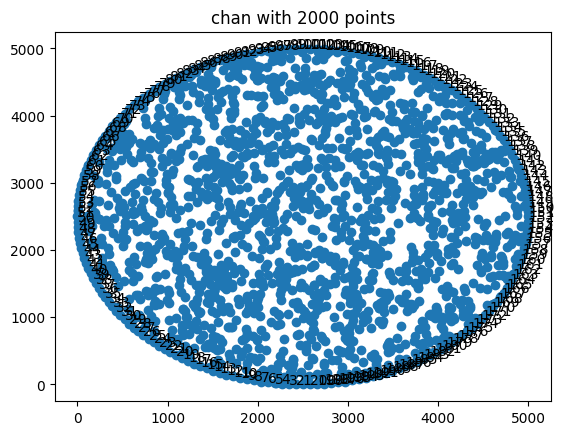

In [ ]:
#PLOTTING

def graph(inSet, outSet, title=""):
    plt.title(title)
    x = []
    y = []
    for i in inSet:
        x.append(i[0])
        y.append(i[1])
    plt.scatter(x, y)
    x = []
    y = []
    for i in outSet:
        x.append(i[0])
        y.append(i[1])
    x.append(outSet[0][0])
    y.append(outSet[0][1])    
    plt.plot(x, y)
    for i in range(len(outSet)):
        plt.text(x[i], y[i], f"{i+1}")   
    plt.show()


resolution = 2_000 # u can change this number

"""
inputSet = []
for _ in range(resolution):
    x = random.gauss(5_000, 5_000)
    y= random.gauss(5_000, 5_000)
    inputSet.append((x,y))
"""
inputSet = genRandWithNH(resolution, 200)

title = f"chan with {resolution} points" # u can change the title
hull = chan(inputSet) # u can change the algo

graph(inputSet, hull, title)